In [35]:
import struct

import cv2
import numpy as np

def get_left_right(depth_map):

    # Given parameters
    focal_length_mm = 3.657  # Focal length in millimeters
    baseline_disparity = 16  # Adjust based on your specific scenario
    # depth_map = cv2.imread('depth_map.png', cv2.IMREAD_GRAYSCALE)

    # Convert focal length to meters
    focal_length_m = focal_length_mm / 1000.0

    # Estimate baseline distance
    baseline_distance = (baseline_disparity * depth_map) / focal_length_m

    # Warp images based on the estimated baseline distance
    left_image = cv2.warpPerspective(src=depth_map, M=np.float32([[1, 0, -baseline_distance], [0, 1, 0]]), dsize=(depth_map.shape[1], depth_map.shape[0]))
    right_image = cv2.warpPerspective(src=depth_map, M=np.float32([[1, 0, baseline_distance], [0, 1, 0]]), dsize=(depth_map.shape[1], depth_map.shape[0]))


    return left_image, right_image


In [50]:
def get_left_right(depth_map, baseline=16, focal_length=3.657):

        # Assuming depth_map is a 2D array representing the depth values

    # Step 1: Generate Disparity Map
    disparity_map = 1.0 / (depth_map + 1e-6)  # Avoid division by zero
    disparity_map = (disparity_map / np.max(disparity_map) * 255).astype(np.uint8)

    # Step 2: Create StereoSGBM object for stereo matching
    stereo = cv2.StereoSGBM_create(minDisparity=0, numDisparities=128, blockSize=5)

    # Step 3: Compute disparity using StereoSGBM
    disparity = stereo.compute(disparity_map, disparity_map)

    # Step 4: Convert disparity to depth
    depth_from_disparity = focal_length * baseline / (disparity + 1e-6)

    # Step 5: Generate Left and Right Views
    left_image = np.zeros_like(depth_map, dtype=np.uint8)
    right_image = np.zeros_like(depth_map, dtype=np.uint8)

    for i in range(depth_map.shape[0]):
        for j in range(depth_map.shape[1]):
            disparity_value = int(disparity[i, j])
            if j - disparity_value >= 0:
                left_image[i, j - disparity_value] = depth_map[i, j]
            if j + disparity_value < depth_map.shape[1]:
                right_image[i, j + disparity_value] = depth_map[i, j]

    return left_image, right_image

(240, 512)
(240, 512) (240, 512)


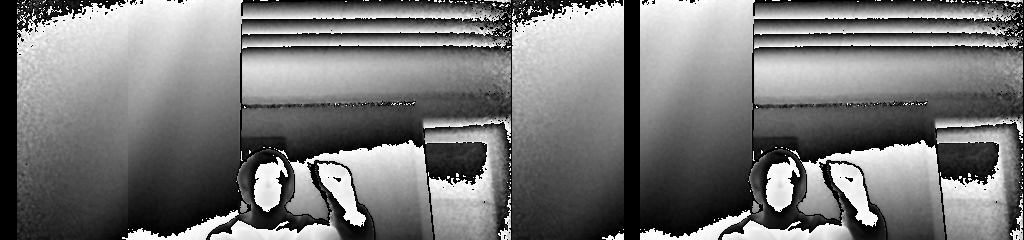

In [51]:
from PIL import Image
import os
import cv2
import numpy as np

def process_dat_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dat"):
                file_path = os.path.join(root, file)
                process_command(file_path)
                break

def process_command(file_path):
    # try:
    img = np.array(read_file(file_path)).astype(np.uint8)
    print(img.shape)
    

    # 512x240 pikseli
    img = img.reshape(240, 512)
    left, right = get_left_right(img)
    print(left.shape, right.shape)
    img = np.concatenate([left, right], axis=1)

    # Przekształć obraz do przestrzeni barwnej RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Konwertuj dane na obiekt Image
    pil_image = Image.fromarray(img_rgb.astype('uint8'))

    # Wyświetl obraz
    display(pil_image)

            # print(f"Przetworzono plik: {file_path}")
    # except Exception as e:
    #     print(e)
        # print(f"Błąd podczas przetwarzania pliku {file_path}: {e}")

# Ścieżka do folderu dataset
dataset_folder = "/home/ant/projects/psl/fingerspelling/dataset/personII/training/AO/5"

# Wywołanie funkcji przetwarzającej pliki .dat w folderze dataset
process_dat_files(dataset_folder)

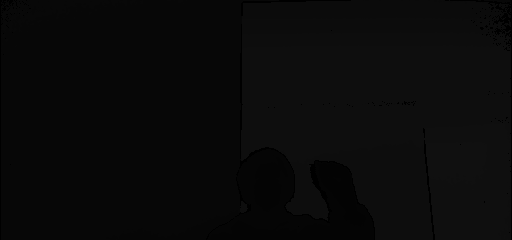

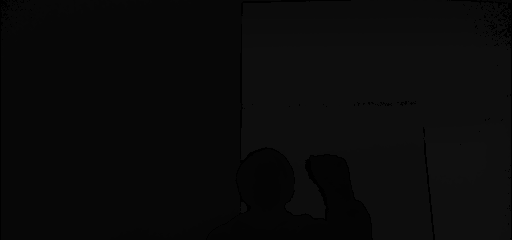

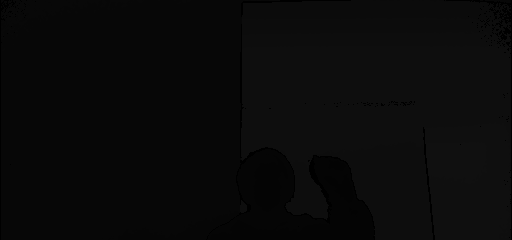

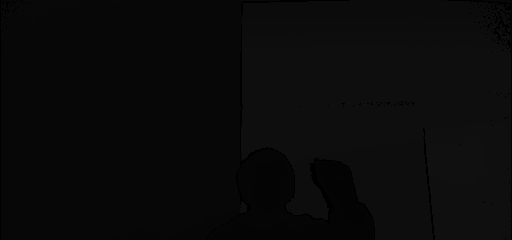

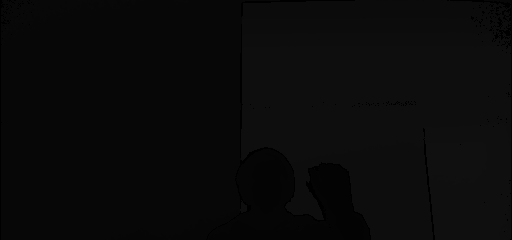

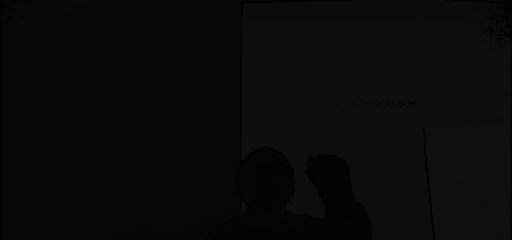

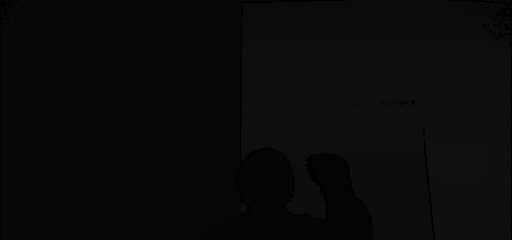

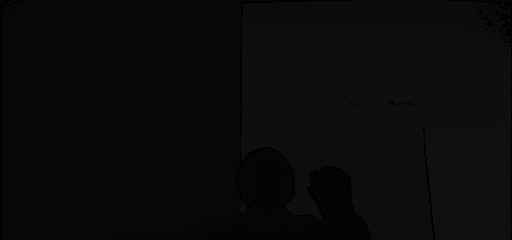

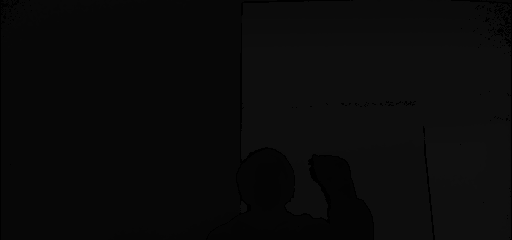

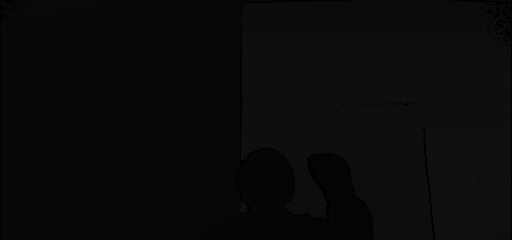

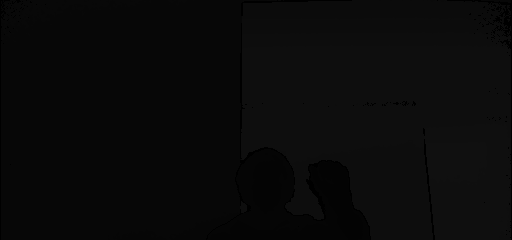

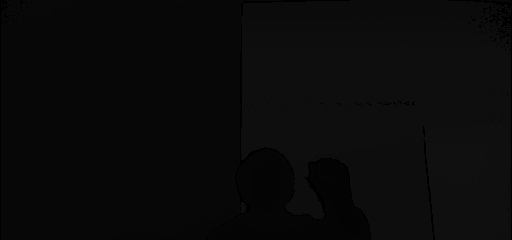

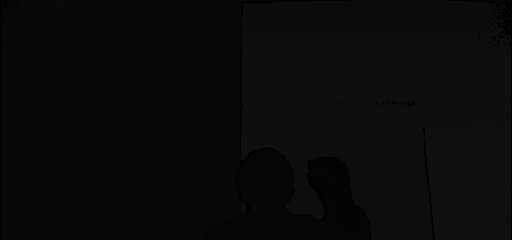

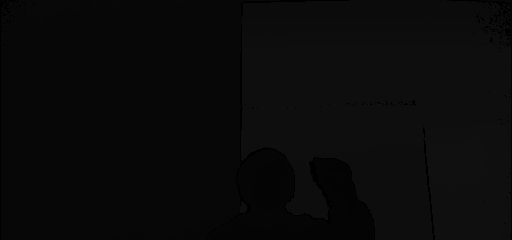

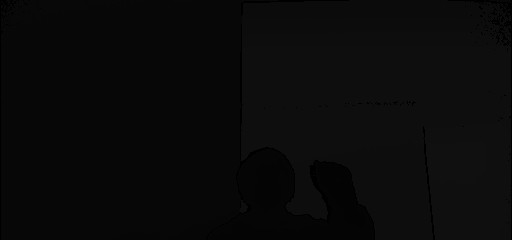

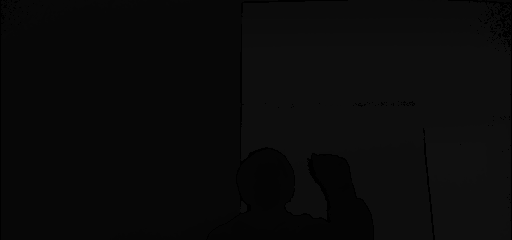

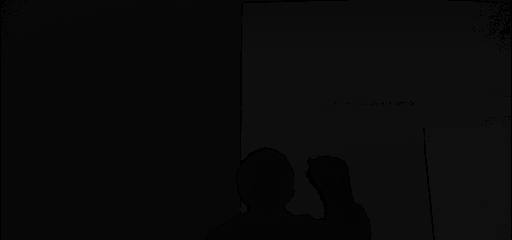

In [23]:
from PIL import Image
import os
import cv2
import numpy as np

def process_dat_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".dat"):
                file_path = os.path.join(root, file)
                process_command(file_path)

def process_command(file_path):
    try:
        with open(file_path, 'rb') as file:
            # Wczytaj dane jako uint16
            img = np.frombuffer(file.read(), dtype=np.uint8)
            # print(f"Rozmiar pliku {file_path}: {img.size} elementów, Kształt danych: {img.shape}")

            # 512x240 pikseli
            img = img.reshape(240, 512, 2)[..., 1]

            # Przekształć obraz do przestrzeni barwnej RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            # Konwertuj dane na obiekt Image
            pil_image = Image.fromarray(img_rgb.astype('uint8'))

            # Wyświetl obraz
            display(pil_image)

            # print(f"Przetworzono plik: {file_path}")
    except Exception as e:
        print(f"Błąd podczas przetwarzania pliku {file_path}: {e}")

# Ścieżka do folderu dataset
dataset_folder = "/home/ant/projects/psl/fingerspelling/dataset/personII/training/AO/5"

# Wywołanie funkcji przetwarzającej pliki .dat w folderze dataset
process_dat_files(dataset_folder)
